In [35]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# creating the Data Frame
df = yf.download('^GSPC', start='1990-08-24', end='2011-08-24');

[*********************100%***********************]  1 of 1 completed


In [10]:
# Creating the empirical return distribution
returns = (df.Open - df.Open.shift(252))/df.Open.shift(252)
distribution = returns.dropna()
print(distribution.mean(),distribution.std())

0.08288017854619155 0.18078483020830713


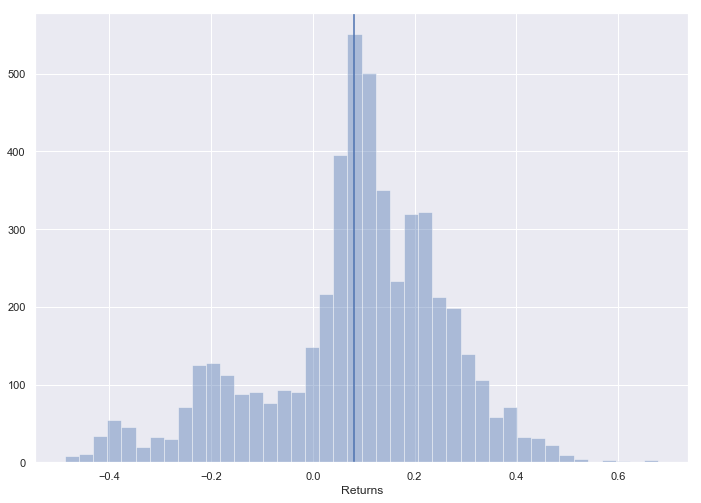

In [39]:
# Visualizing the empirical distribution
sorted_dist = pd.DataFrame(distribution.sort_values(ascending=True))
ax = sns.distplot(sorted_dist.Open, kde = False, axlabel = 'Returns', bins = 42)
plt.axvline(0.082, 0,4.0)

In [42]:
# Defining the products
def product_1(distribution): #product 103.6 
    extraction = round(random.choice(distribution)*100,2)
    product_return = 3.6
    
    return extraction,product_return
     
def product_2(distribution):    #product 100
    extraction = round(random.choice(distribution)*100,2)
    if extraction < 0.0:
        product_return = 0.0
    else:
        product_return = round(0.4*extraction,2)
    
    return extraction,product_return

def product_3(distribution):    #product 90
    extraction = round(random.choice(distribution)*100,2)
    if extraction < -13.70:
        product_return = -10.0
    else:
        product_return = round(0.73*extraction,2)
    
    return extraction,product_returnb

def product_4(distribution):    #product 80
    extraction = round(random.choice(distribution)*100,2)
    if extraction < -22.00:
        product_return = -20.0
    else:
        product_return = round(0.91*extraction,2)
     
    return extraction,product_return

def product_5(distribution):    #product 0
    extraction = round(random.choice(distribution)*100,2)
    product_return = extraction
    
    return extraction,product_return

In [259]:
# Computing empirical sd of products
std_1 = 0.0
std_2 = round(np.std([product_2(distribution)[1] for i in range(100000)]),2)
std_3 = round(np.std([product_3(distribution)[1] for i in range(100000)]),2)
std_4 = round(np.std([product_4(distribution)[1] for i in range(100000)]),2)
std_5 = 18.08
std_1, std_2, std_3, std_4, std_5

(0.0, 4.62, 10.88, 14.94, 18.08)

In [227]:
def realized_return(distribution,product):
    product_index = int(product[-1])
    realized_return = globals()[product](distribution)[1]
    return realized_return

In [260]:
# Defining the rule by which a person decides to switch product
def new_choice_utility_myop(last_product, a = .1, σ = 18):
    product_index = int(last_product[-1])
    results = globals()[last_product](distribution)
    risk = np.array([std_1, std_2, std_3, std_4, std_5])
    utility_p1 = realized_return(distribution,"product_1")
    utility_p2 = realized_return(distribution,"product_2")
    utility_p3 = realized_return(distribution,"product_3")
    utility_p4 = realized_return(distribution,"product_4")
    utility_p5 = realized_return(distribution,"product_5") 
    utilities = np.array([utility_p1,utility_p2, utility_p3, utility_p4, utility_p5])
    risk_corrected_utilities = utilities - np.dot(a * .5,risk**2)
    max_utility = np.argmax(risk_corrected_utilities) + 1
    if max(risk_corrected_utilities) > utilities[product_index-1]:
        return max_utility
    else:    
        return product_index

In [261]:
# Now we will simulate the experiment, assuming a sample of 100_000 people, distributed as in figure 3 of the paper
N = 100000
product_1_holders = int(N * 0.067)
product_2_holders = int(N * 0.21)
product_3_holders = int(N * 0.419)
product_4_holders = int(N * 0.267)
product_5_holders = int(N * 0.038)

In [262]:
# Determining the new choices with utilities
new_choice_from_p1 = [new_choice_utility_myop("product_1") for i in range(product_1_holders)]
new_choice_from_p2 = [new_choice_utility_myop("product_2") for i in range(product_2_holders)]
new_choice_from_p3 = [new_choice_utility_myop("product_3") for i in range(product_3_holders)]
new_choice_from_p4 = [new_choice_utility_myop("product_4") for i in range(product_4_holders)]
new_choice_from_p5 = [new_choice_utility_myop("product_5") for i in range(product_5_holders)]

In [263]:
#Aggregating, new distribution from product 1
sum([nc == 1 for nc in new_choice_from_p1]), sum([nc == 2 for nc in new_choice_from_p1]), sum([nc == 3 for nc in new_choice_from_p1]), sum([nc == 4 for nc in new_choice_from_p1]), sum([nc == 5 for nc in new_choice_from_p1])

(1077, 1404, 1704, 1483, 1032)

In [264]:
#Aggregating, new distribution from product 2
sum([nc == 1 for nc in new_choice_from_p2]), sum([nc == 2 for nc in new_choice_from_p2]), sum([nc == 3 for nc in new_choice_from_p2]), sum([nc == 4 for nc in new_choice_from_p2]), sum([nc == 5 for nc in new_choice_from_p2])

(2873, 5507, 5208, 4341, 3071)

In [265]:
#Aggregating, new distribution from product 3
sum([nc == 1 for nc in new_choice_from_p3]), sum([nc == 2 for nc in new_choice_from_p3]), sum([nc == 3 for nc in new_choice_from_p3]), sum([nc == 4 for nc in new_choice_from_p3]), sum([nc == 5 for nc in new_choice_from_p3])

(3541, 6543, 19347, 7291, 5178)

In [266]:
#Aggregating, new distribution from product 4
sum([nc == 1 for nc in new_choice_from_p4]), sum([nc == 2 for nc in new_choice_from_p4]), sum([nc == 3 for nc in new_choice_from_p4]), sum([nc == 4 for nc in new_choice_from_p4]), sum([nc == 5 for nc in new_choice_from_p4])

(1927, 3428, 4825, 13523, 2997)

In [267]:
#Aggregating, new distribution from product 5
sum([nc == 1 for nc in new_choice_from_p5]), sum([nc == 2 for nc in new_choice_from_p5]), sum([nc == 3 for nc in new_choice_from_p5]), sum([nc == 4 for nc in new_choice_from_p5]), sum([nc == 5 for nc in new_choice_from_p5])

(242, 432, 603, 516, 2007)